# Observations and Insights

In [33]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# read data results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

#combining the data into one data frame
complete_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
complete_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
#finding number of mice in the dataframe
print(len(complete_mouse_data["Mouse ID"].unique()))

249


In [86]:
#pulling out all dupicate mice by ID number and getting their indicies (Chen, 2021)
bad_mice_location = complete_mouse_data.loc[(complete_data.duplicated() == True), :].index
#finding the "Mouse ID"s for the duplicate mice
bad_mice = complete_mouse_data.iloc[bad_mice_location]["Mouse ID"]

#dropping the data related to the bad mice by only keeping the non-duplicated mice's data (2020 Drop or delete the row)
cleaned_mouse_data = complete_mouse_data.loc[complete_mouse_data["Mouse ID"].values != bad_mice.values, :]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
#finding number of mice in the cleaned dataframe
print(len(cleaned_mouse_data["Mouse ID"].unique()))

248


# Summary Statistics

In [95]:
#obtain list of drug regiments then alphabetize
drug_regimens = sorted(cleaned_mouse_data["Drug Regimen"].unique())

#group data by drug regimen to run statistics calculations on
drug_grouped_cleaned_mouse_data = cleaned_mouse_data.groupby("Drug Regimen")

#find mean, median, variance, standard deviation, and SEM of tumor volume
tumor_mean = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].median()
tumor_variance = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].var()
tumor_std_dev = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].sem()

#put data into summary data frame
drug_regimen_summary_stats = pd.DataFrame({
    "Drug Regimen": drug_regimens,
    "Tumor Volume (mm3) Mean": tumor_mean,
    "Tumor Volume (mm3) Median": tumor_median, 
    "Tumor Volume (mm3) Variance": tumor_variance, 
    "Tumor Volume (mm3) Standard Deviation": tumor_std_dev, 
    "Tumor Volume (mm3) SEM": tumor_sem
})

#set index to the drug regimen names
drug_regimen_summary_stats = drug_regimen_summary_stats.set_index("Drug Regimen")
drug_regimen_summary_stats

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [114]:
#for the bar charts- measurements for each regiment
drug_measurement_counts = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].count()

#for the pie charts - number of male and female mice (Pandas Development Team, 2021 .nunique())
gendered_mice = cleaned_mouse_data.groupby("Sex")
gendered_mice_counts = gendered_mice["Mouse ID"].nunique()

Using Pandas:

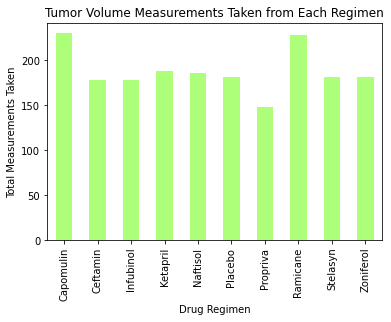

In [135]:
#creating a bar chart
drug_count_plot = drug_measurement_counts.plot(kind="bar", color="#ADFF79")

#labeling axes and setting a title
drug_count_plot.set_xlabel("Drug Regimen")
drug_count_plot.set_ylabel("Total Measurements Taken")
drug_count_plot.set_title("Tumor Volume Measurements Taken from Each Regimen")

plt.show()

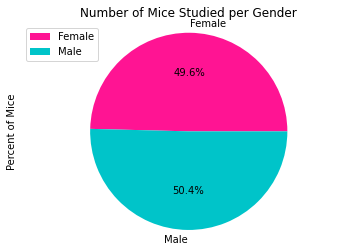

In [134]:
#creating a pie chart
gendered_mice_pie = gendered_mice_counts.plot(kind="pie", title="Number of Mice Studied per Gender", colors=("#ff1493", "#00c4c9"), autopct="%1.1f%%")

#labeling the y-axis and creating equal axes
gendered_mice_pie.set_ylabel("Percent of Mice")
plt.axis("equal")

#adding a legend
plt.legend(loc="upper left")

plt.show()

Using Matplotlib:

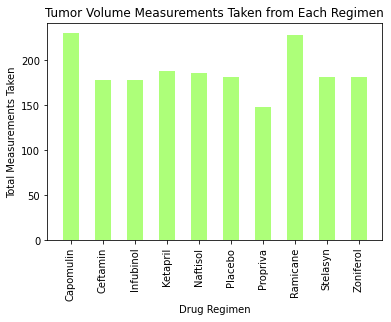

In [141]:
#creating a bar chart
plt.bar(drug_regimens, drug_measurement_counts, color="#ADFF79", align="center", width=0.5)

#labeling axes and setting title
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")
plt.title("Tumor Volume Measurements Taken from Each Regimen")

#rotate the labels so they can be read (jeeteshgavande30, 2021)
plt.xticks(rotation = 90)

plt.show()